In [1]:
%matplotlib inline

In [2]:
# !g++ legendre-delay.cpp -O3 && ./a.out > legendre-delay.csv

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import csv

data = []
with open('legendre-delay.csv', 'r') as f:
    for row in csv.reader(f, delimiter=','):
        data.append(list(map(float, row)))
data = np.asarray(data, dtype=np.float128)

/home/arvoelke/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


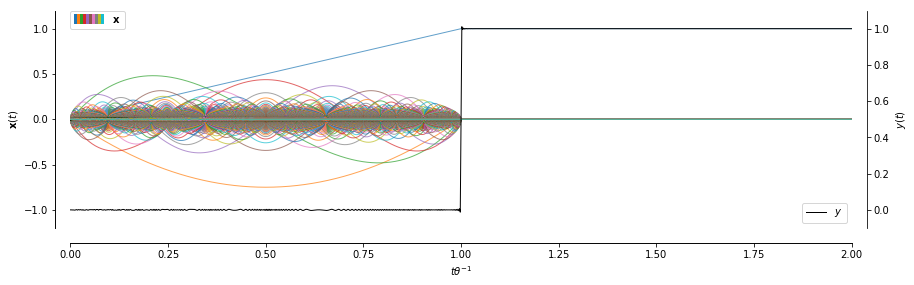

In [5]:
import sys
#sys.path.append("/home/arvoelke/CTN/arvoelke-phd/code")
from phd import *
from utils import HandlerDashedLines, LineCollection

q = 10240
dt = 1e-5
steps = int(q/dt)
#samples = int(1e4)
#sample_every = int(steps / samples)
t = np.linspace(0, 2, len(data))

xlabel = r"${\bf x}(t)$"
ylabel = r"$y(t)$"
xleg = r"${\bf x}$"
yleg = r"$y$"

fig, ax1 = plt.subplots(1, 1, figsize=(14, 4))
ax1.plot(t, data, lw=1, alpha=0.7)
ax1.set_xlabel(r"$t \theta^{-1}$")
ax1.set_ylabel(xlabel)

cmap = sns.color_palette(None, 10)
lc = LineCollection(len(cmap) * [[(0, 0)]], lw=10,
                    colors=cmap)
ax1.legend([lc], [xleg], handlelength=3,
           handler_map={type(lc): HandlerDashedLines()},
           borderaxespad=0., loc='upper left')

fudge = 0.1
ax1.set_xlim(np.min(t), np.max(t))
ax1.set_ylim(-1-2*fudge, 1+2*fudge)
ax2 = ax1.twinx()
ax2.plot(t, np.sum(data, axis=1), lw=1, c='black', label=yleg)
ax2.set_ylim(-fudge, 1+fudge)
ax2.set_ylabel(ylabel)
ax2.legend(loc='lower right')

offset = 15
sns.despine(offset=offset, ax=ax1, right=False)
ax2.spines['right'].set_position(('outward', offset))
sns.despine(offset=offset, ax=ax2)

savefig("legendre-delay.png", dpi=1200)

fig.show()

In [6]:
2 * (q/2) / dt, steps

(1023999999.9999999, 1023999999)